<a href="https://www.kaggle.com/code/abdalrahmangomaa2805/analyzing-online-sports-revenue?scriptVersionId=281200153" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

brands = pd.read_csv('/kaggle/input/analyzing-online-sports-revenue/brands.csv')
finance = pd.read_csv('/kaggle/input/analyzing-online-sports-revenue/finance.csv')
info = pd.read_csv('/kaggle/input/analyzing-online-sports-revenue/info.csv')
reviews = pd.read_csv('/kaggle/input/analyzing-online-sports-revenue/reviews.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print('brands.head()')
print(brands.head())
print('finance.head()')
print(finance.head())
print('info.head()')
print(info.head())
print('reviews.head()')
print(reviews.head())

brands.head()
  product_id   brand
0     AH2430     NaN
1     G27341  Adidas
2     CM0081  Adidas
3     B44832  Adidas
4     D98205  Adidas
finance.head()
  product_id  listing_price  sale_price  discount  revenue
0     AH2430            NaN         NaN       NaN      NaN
1     G27341          75.99       37.99       0.5  1641.17
2     CM0081           9.99        5.99       0.4   398.93
3     B44832          69.99       34.99       0.5  2204.37
4     D98205          79.99       39.99       0.5  5182.70
info.head()
                                       product_name product_id  \
0                                               NaN     AH2430   
1              Women's adidas Originals Sleek Shoes     G27341   
2                 Women's adidas Swim Puka Slippers     CM0081   
3  Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4          Women's adidas Originals Taekwondo Shoes     D98205   

                                         description  
0                          

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [3]:
print(brands.isnull().sum())
print(finance.isnull().sum())
print(info.isnull().sum())
print(reviews.isnull().sum())

product_id     0
brand         59
dtype: int64
product_id        0
listing_price    59
sale_price       59
discount         59
revenue          59
dtype: int64
product_name    59
product_id       0
description     62
dtype: int64
product_id     0
rating        59
reviews       59
dtype: int64


In [4]:
print(brands.duplicated().sum())
print(finance.duplicated().sum())
print(info.duplicated().sum())
print(reviews.duplicated().sum())

0
0
0
0


In [5]:
finance['discount_amount'] = finance['listing_price'] - finance['sale_price']


In [6]:
df = pd.merge(finance, brands, on='product_id', how='left')
df = pd.merge(df, info, on='product_id', how='left')
df = pd.merge(df, reviews, on='product_id', how='left')

In [7]:
print(df.head())
print(df.info())

  product_id  listing_price  sale_price  discount  revenue  discount_amount  \
0     AH2430            NaN         NaN       NaN      NaN              NaN   
1     G27341          75.99       37.99       0.5  1641.17             38.0   
2     CM0081           9.99        5.99       0.4   398.93              4.0   
3     B44832          69.99       34.99       0.5  2204.37             35.0   
4     D98205          79.99       39.99       0.5  5182.70             40.0   

    brand                                      product_name  \
0     NaN                                               NaN   
1  Adidas              Women's adidas Originals Sleek Shoes   
2  Adidas                 Women's adidas Swim Puka Slippers   
3  Adidas  Women's adidas Sport Inspired Questar Ride Shoes   
4  Adidas          Women's adidas Originals Taekwondo Shoes   

                                         description  rating  reviews  
0                                                NaN     NaN      NaN  
1 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [8]:
df.describe()

,listing_price,sale_price,discount,revenue,discount_amount,rating,reviews
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000,3120.000000
mean,69.719455,60.103035,0.276090,3951.571263,9.61642,3.265801,41.545513
std,46.586909,41.906852,0.224955,4440.312551,49.94211,1.392685,31.361668
min,0.000000,4.490000,0.000000,0.000000,-365.00000,0.000000,0.000000
25%,45.990000,29.990000,0.000000,863.890000,0.00000,2.600000,12.000000
50%,59.990000,45.990000,0.400000,2735.280000,23.00000,3.500000,39.000000
75%,89.990000,77.990000,0.500000,5345.015000,33.00000,4.400000,69.000000
max,299.990000,365.000000,0.600000,64203.930000,115.00000,5.000000,223.000000


In [9]:
# Average revenue and discount by brand
brand_stats = df.groupby('brand').agg({
    'revenue' : 'mean',
    'discount' : 'mean',
    'rating' : 'mean'
}).reset_index()
brand_stats

,brand,revenue,discount,rating
0,Adidas,4476.356924,0.334524,3.367184
1,Nike,1472.079376,0.000000,2.786789


In [10]:
# Top 10 products by revenue
top_revenue = df.sort_values('revenue', ascending=False).head(10)
top_revenue

,product_id,listing_price,sale_price,discount,revenue,discount_amount,brand,product_name,description,rating,reviews
2750,310805-137,0.00,159.95,0.0,64203.93,-159.95,Nike,Air Jordan 10 Retro,"Featuring soft, lightweight cushioning, the Ai...",4.7,223.0
1326,FV7826,239.99,239.99,0.0,37150.45,0.00,Adidas,Unisex Originals CRAIG GREEN KONTUUR II SHOES,Go for the unexpected. British designer Craig ...,2.4,86.0
1591,FV6794,239.99,239.99,0.0,34990.54,0.00,Adidas,Unisex Originals CRAIG GREEN KONTUUR I SHOES,Live for the unpredictable. London-born design...,4.1,81.0
1474,EG5185,199.99,199.99,0.0,33838.31,0.00,Adidas,Men's adidas Running Universal Works Ultraboos...,"Created by designer David Keyte, Universal Wor...",3.9,94.0
1563,EF9623,279.99,279.99,0.0,31246.88,0.00,Adidas,Men's adidas Originals ZX 4000 4D Shoes,The ZX trainers series resets the running scen...,3.1,62.0
2558,EF0893,179.99,179.99,0.0,30454.31,0.00,Adidas,Men's Running Ultraboost PB Shoes,"Meet your new best friend for your fastest, lo...",2.6,94.0
1629,EG0761,169.99,169.99,0.0,29986.24,0.00,Adidas,Women's Running Ultraboost 20 Shoes,Confidence from the ground up. These adidas ru...,2.8,98.0
1377,EF2335,219.99,219.99,0.0,29698.65,0.00,Adidas,UNISEX adidas Originals Pharrell Williams Hu N...,Pairing vibrant colours with words that honour...,2.7,75.0
1605,EG1071,179.99,179.99,0.0,28834.40,0.00,Adidas,Women's adidas by Stella Mccartney Running Ult...,"Energy assured, from dusk until dawn. These sh...",3.5,89.0
2495,EG5933,169.99,169.99,0.0,28762.31,0.00,Adidas,Men's Originals Salvapor 032c Shoes,Berlin-based magazine 032c's collaboration wit...,4.9,94.0


In [11]:
# Top 10 products by rating
top_rating = df.sort_values('rating', ascending=False).head(10)
top_rating

,product_id,listing_price,sale_price,discount,revenue,discount_amount,brand,product_name,description,rating,reviews
2812,AT7975-606,0.00,84.95,0.0,152.91,-84.95,Nike,Nike Mercurial Superfly 7 Academy IC,The soft upper of the Nike Mercurial Superfly ...,5.0,1.0
1109,EG4588,75.99,75.99,0.0,2325.29,0.00,Adidas,Unisex adidas Originals Continental Vulc Shoes,No need for a leotard and leg warmers. Flash t...,5.0,17.0
3038,AO0571-606,0.00,74.95,0.0,134.91,-74.95,Nike,Nike Phantom Venom Academy TF,The Nike Phantom Venom Academy TF is engineere...,5.0,1.0
3036,BQ4424-700,109.95,76.97,0.0,138.55,32.98,Nike,Nike Air Force 1 '07 Premium,The Nike Air Force 1 '07 Premium captures the ...,5.0,1.0
2721,BV7725-500,79.95,47.97,0.0,259.04,31.98,Nike,Nike Daybreak SP,The Nike Daybreak SP marks the return of the 1...,5.0,3.0
3028,844127-108,0.00,44.95,0.0,80.91,-44.95,Nike,Nike Potential 3,The Nike Potential 3 Unisex Cricket Shoe deliv...,5.0,1.0
3027,AQ2567-002,139.95,83.97,0.0,151.15,55.98,Nike,Nike Air Max Tailwind IV,The Nike Air Max Tailwind IV gives a new look ...,5.0,1.0
2719,AT7946-414,0.00,84.95,0.0,305.82,-84.95,Nike,Nike Mercurial Superfly 7 Academy MG,Building on the forefoot plate innovation of t...,5.0,2.0
2828,CD7288-001,79.95,63.97,0.0,115.15,15.98,Nike,Nike Zoom Rival Fly,"Inspired by Japan's Ekiden relay runners, the ...",5.0,1.0
3023,CD4573-001,0.00,109.95,0.0,395.82,-109.95,Nike,Nike Air Zoom Pegasus 36,The iconic Nike Air Zoom Pegasus 36 returns wi...,5.0,2.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


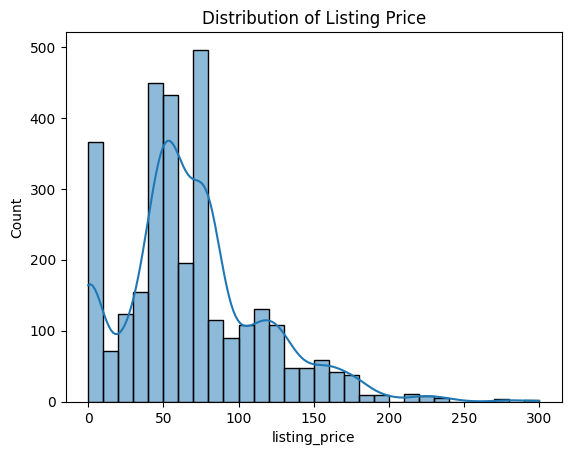

In [13]:
# Histogram of listing price
sns.histplot(df['listing_price'], bins=30, kde=True)
plt.title('Distribution of Listing Price')
plt.show()

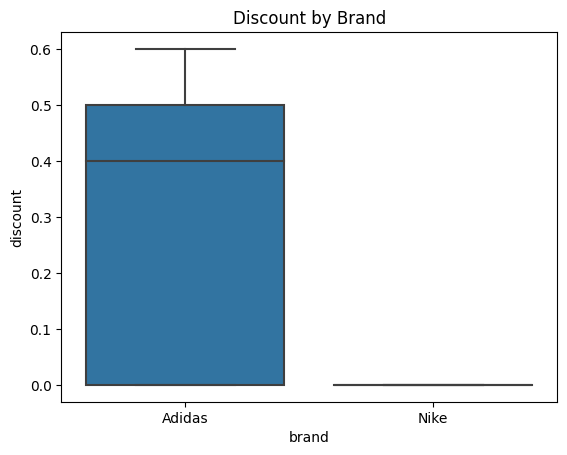

In [14]:
# Boxplot of discount by brand
sns.boxplot(x='brand', y='discount', data=df)
plt.title('Discount by Brand')

plt.show()

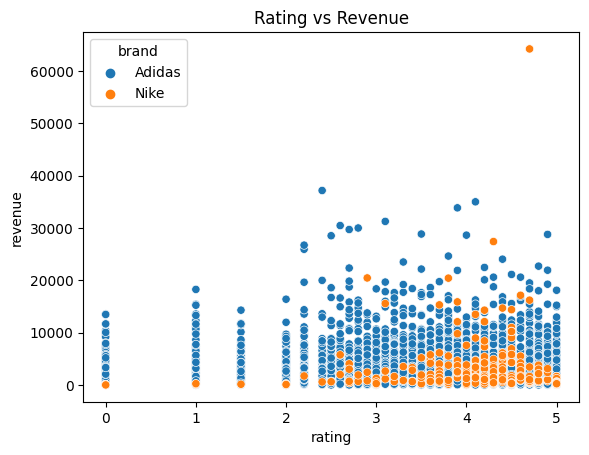

In [15]:
# Scatter: rating vs revenue
sns.scatterplot(x='rating', y='revenue', data=df, hue='brand')
plt.title('Rating vs Revenue')
plt.show()

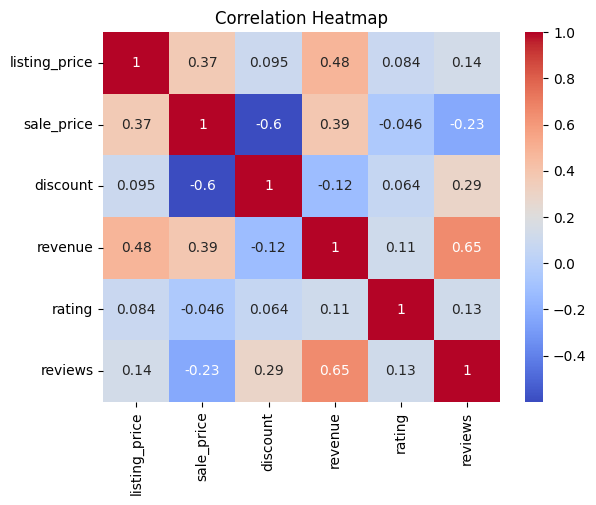

In [16]:
# Correlation heatmap
sns.heatmap(df[['listing_price','sale_price','discount','revenue','rating','reviews']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()